 Mean Squared Error: 2.17
 R² Score: -0.21
 File saved: predicted_movie_ratings.csv


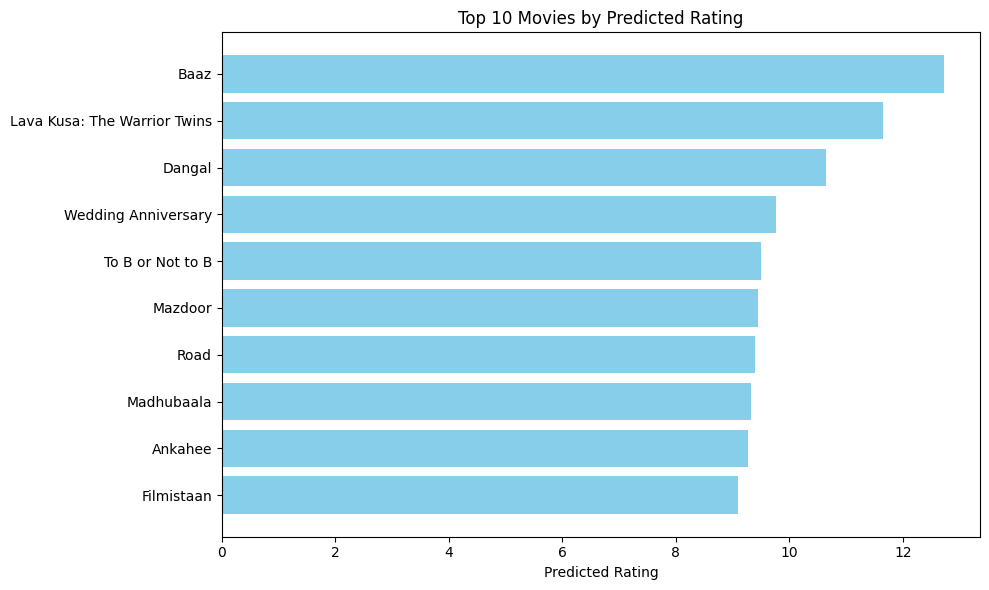

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Install dependencies
!pip install pandas scikit-learn matplotlib

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Upload CSV file to Colab manually
file_path = '/content/IMDb Movies India.csv'

# 2. Load dataset with correct encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 3. Rename columns (if needed)
df.rename(columns={
    'Name': 'Title',
    'Actor 1': 'Actor1',
    'Actor 2': 'Actor2',
    'Actor 3': 'Actor3'
}, inplace=True)

# 4. Drop rows with missing required data
df.dropna(subset=['Genre', 'Director', 'Actor1', 'Year', 'Duration', 'Rating'], inplace=True)

# 5. Create 'Main_Actor' column
df['Main_Actor'] = df['Actor1']

# 6. Clean 'Year' column — extract year digits
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

# 7. Clean 'Duration' column — extract number of minutes
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df.dropna(subset=['Duration'], inplace=True)
df['Duration'] = df['Duration'].astype(int)

# 8. Define features and label
X = df[['Title', 'Genre', 'Director', 'Main_Actor', 'Year', 'Duration']]
y = df['Rating']
movie_names = X['Title']
X = X.drop(columns=['Title'])

# 9. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, names_test = train_test_split(movie_names, test_size=0.2, random_state=42)

# 10. Preprocessing
categorical_features = ['Genre', 'Director', 'Main_Actor']
numerical_features = ['Year', 'Duration']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numerical_features)
])

# 11. Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 12. Train model
pipeline.fit(X_train, y_train)

# 13. Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.2f}")

# 14. Save results
output_df = pd.DataFrame({
    'Movie': names_test.values,
    'Actual Rating': y_test.values,
    'Predicted Rating': y_pred
})

output_df.to_csv('/content/predicted_movie_ratings.csv', index=False)
print(" File saved: predicted_movie_ratings.csv")

# 15. Visualize Top 10 Predicted Movies
top_10 = output_df.sort_values(by='Predicted Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Movie'], top_10['Predicted Rating'], color='skyblue')
plt.xlabel("Predicted Rating")
plt.title("Top 10 Movies by Predicted Rating")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


